In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [13]:
housing = datasets.fetch_california_housing(as_frame=True)
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [14]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
df_housing = housing.frame # Cetak bentuk frame/table
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
arr_medhouseval = df_housing["MedHouseVal"].values
arr_medhouseval

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [17]:
arr_medhouselabel = np.zeros(len(arr_medhouseval), dtype=int)
arr_medhouselabel[arr_medhouseval >= 1.8] = 1
arr_medhouselabel

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
df_housing["MedHouseLabel"] = arr_medhouselabel
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseLabel
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


## Plooting

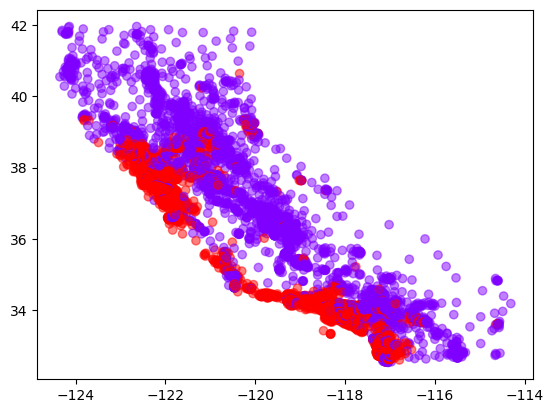

In [19]:
fig, ax =plt.subplots()

ax.scatter(df_housing["Longitude"].values, df_housing["Latitude"].values,
           c = df_housing["MedHouseLabel"].values,
           alpha = 0.5,
           cmap = "rainbow"
           )
plt.show()

## $k$-NN

In [30]:
data = df_housing[["Longitude","Latitude"]].values


X_train, X_test, y_train, y_test = train_test_split(
    data, df_housing["MedHouseLabel"].values, test_size=0.2, shuffle=False
)

In [35]:
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(5)
)
knn_model.fit(X_train, y_train) # Training Process

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [39]:
y_pred = knn_model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

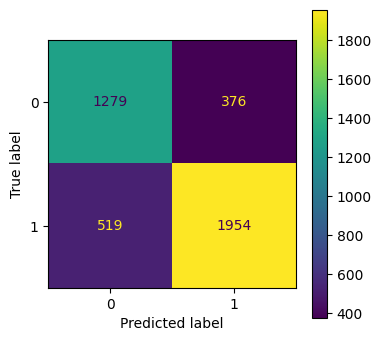

In [42]:
fig, ax = plt.subplots(figsize=(4,4))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

plt.show

Precision and recall

In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1655
           1       0.84      0.79      0.81      2473

    accuracy                           0.78      4128
   macro avg       0.77      0.78      0.78      4128
weighted avg       0.79      0.78      0.78      4128



## SVM

In [49]:
svm_model = make_pipeline(
    StandardScaler(),
    svm.LinearSVC(dual="auto")
)

svm_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual='auto'))])

In [45]:
y_pred_svm = svm_model.predict(X_test)

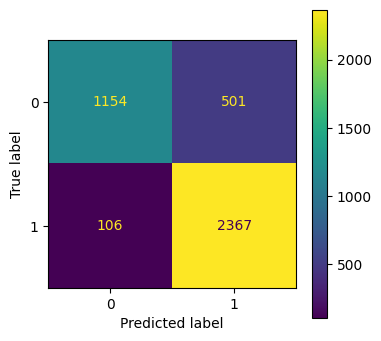

In [48]:
fig, ax = plt.subplots(figsize=(4,4))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, ax=ax)

plt.show()

In [50]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1655
           1       0.83      0.96      0.89      2473

    accuracy                           0.85      4128
   macro avg       0.87      0.83      0.84      4128
weighted avg       0.86      0.85      0.85      4128



In [ ]:
## Decision Tree